# Total Iornizing Does (TID) Test

## FTB boards (Batch 3) before the TID

5 out of 10 selected to do the test, the measurments included the input currents, baseline, Aout amplitude, and the jitter vs charge for high/low poewr mode in default gain setup.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
#jtplot.style()

xjitter = [4,5,6,8,10,12,15,20]
fig_save_path = './plot/'
def make_jitter_plot(yvalue, title, plot=False):
    plt.figure(figsize=(12, 8))
    for key in yvalue.keys():
        plt.plot(xjitter,yvalue[key],'-o',label=key)
    plt.xticks(ticks = xjitter)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('Charge (fC)',fontsize = 20)
    plt.ylabel('Jitter (ps)',fontsize = 20)
    plt.grid(linestyle='--')
    plt.legend(loc='best',prop={'size': 18})
    plt.ylim([0,40])
    plt.title(title,fontsize=25)
    if plot : 
        plt.savefig(fig_save_path+'beforeTID_jitter_'+board_name+'.jpg')
        plt.show()
    
def make_jitter_plot_with_ref(yvalue, yvalue2, title):
    make_jitter_plot(yvalue2, title)
    arrs= []
    for value in yvalue.values():
        arrs.append(value)
    arrs = np.array(arrs)
    ymax = np.amax(arrs, axis=0)
    ymin = np.amin(arrs, axis=0)
    plt.fill_between(xjitter,ymin,ymax,color='gray',alpha=0.5,label = 'reference')
    #plt.ylim([5,25])
    #plt.title(title)
    plt.savefig(fig_save_path+'afterTID_jitter_'+board_name+'.jpg')
    plt.show()

def make_jitter_plots(board_name, yvalue1, yvalue2):
    title_string = board_name+' Jitter vs Charge '
    make_jitter_plot(yvalue1, title_string+'(Before TID test)', True)
    make_jitter_plot_with_ref(yvalue1,yvalue2,title_string+'(After TID test)')

xAout=[4,6,12,20]

def make_Aout_overlay(name, title, yvalue0, yvalue1):
    yvalue = yvalue0.copy()
    yvalue.update(yvalue1)
    plt.figure(figsize=(12, 8))
    for key in yvalue.keys():
        plt.plot(xAout,yvalue[key],'-o',label=key)
    plt.xticks(ticks = xAout)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('Charge (fC)',fontsize = 20)
    plt.ylabel('Amplitude (mA)',fontsize = 20)
    plt.grid(linestyle='--')
    plt.legend(loc='best',prop={'size': 18})
    plt.ylim([0,2000])
    plt.title(title,fontsize=25)
    plt.savefig(fig_save_path+name+'.jpg')
    plt.show()
    
def make_Aout_band(name, title, yvalue0, yvalue1):
    plt.figure(figsize=(12, 8))
    arrs= []
    arrs1=[]
    for value in yvalue0.values():
        arrs.append(value)
    arrs = np.array(arrs)
    ymax = np.amax(arrs, axis=0)
    ymin = np.amin(arrs, axis=0)
    for value in yvalue1.values():
        arrs1.append(value)
    arrs1 = np.array(arrs1)
    ymax1 = np.amax(arrs1, axis=0)
    ymin1 = np.amin(arrs1, axis=0)
    plt.fill_between(xAout,ymin,ymax,color='C0',alpha=0.5,label = 'Before')
    plt.fill_between(xAout,ymin1,ymax1,color='C3',alpha=0.5,label = 'After')
    plt.xticks(ticks = xAout)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('Charge (fC)',fontsize = 20)
    plt.ylabel('Amplitude (mA)',fontsize = 20)
    plt.grid(linestyle='--')
    plt.legend(loc='best',prop={'size': 18})
    plt.ylim([0,2000])
    plt.title(title,fontsize=25)
    plt.savefig(fig_save_path+name+'_band.jpg')
    plt.show()
    
def make_Aout_plot(name, title, yvalue0, yvalue1):
    make_Aout_overlay(name, title, yvalue0, yvalue1)
    make_Aout_band(name, title, yvalue0, yvalue1)

#### low power status
Below is the summary of the low power jitter vs charge measurement before/after TID test

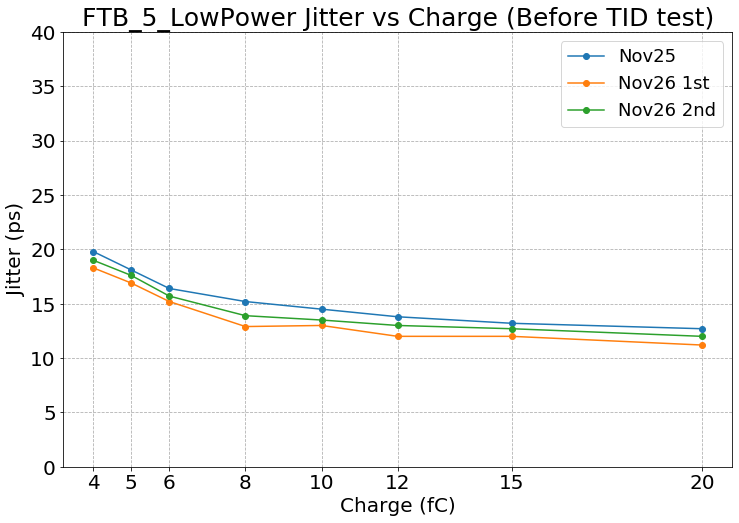

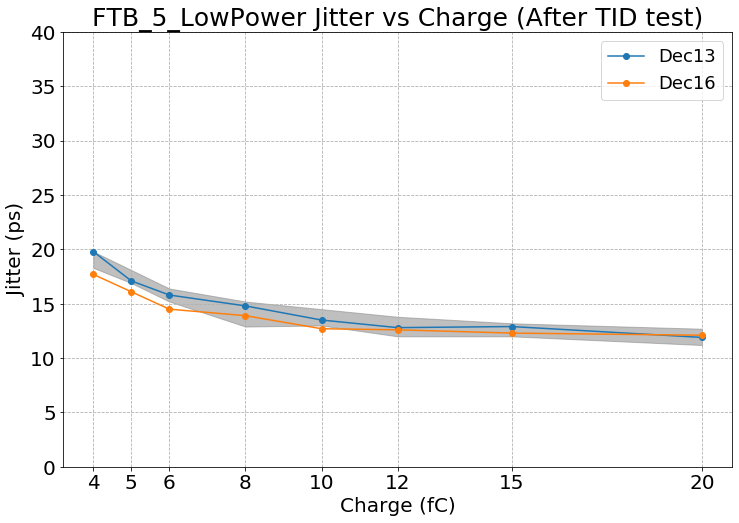

dict_keys(['Dec13', 'Dec16'])


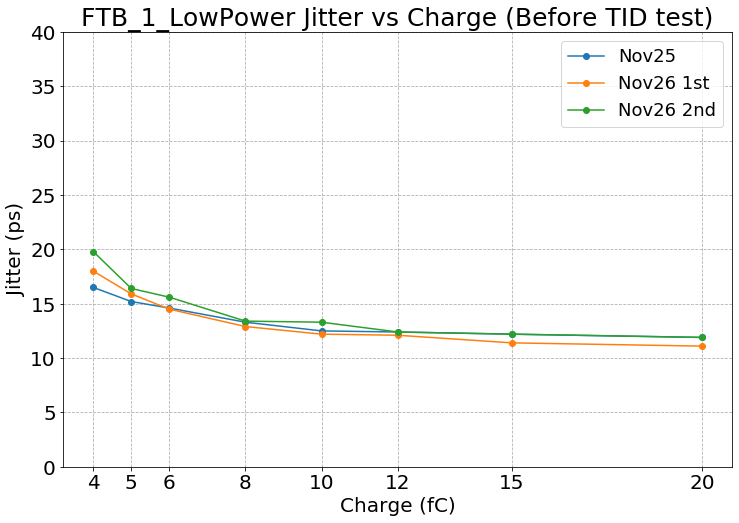

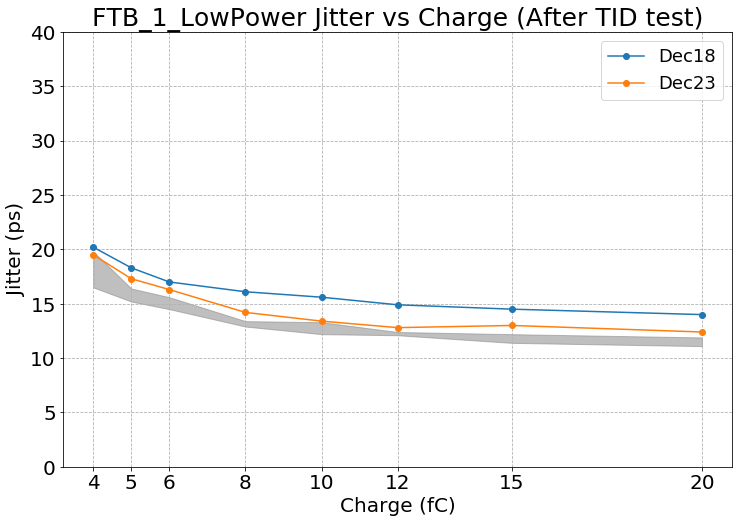

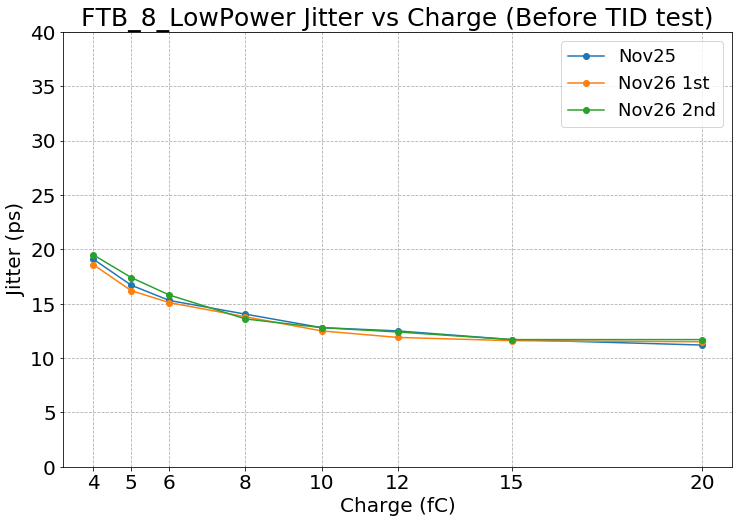

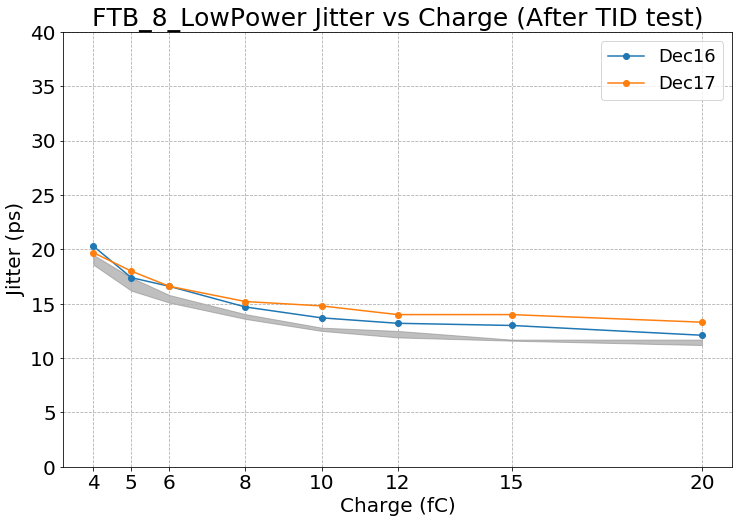

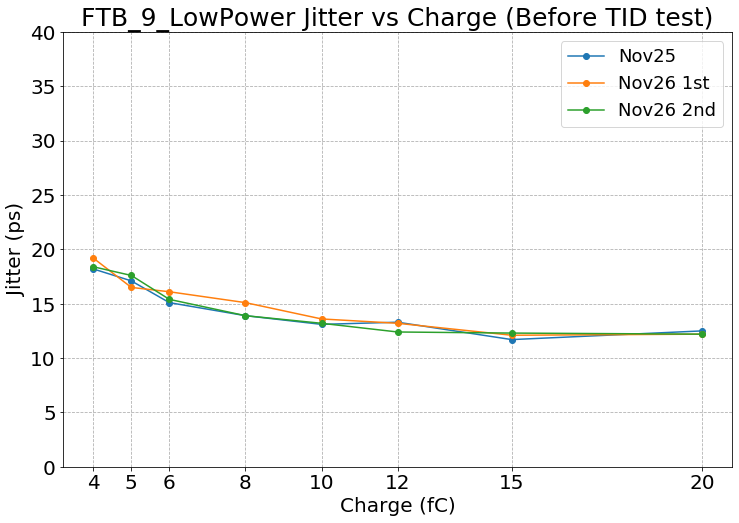

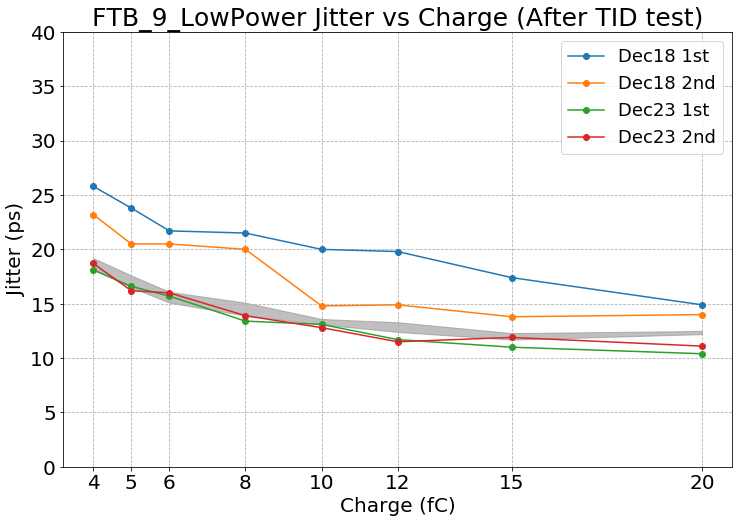

In [2]:
#FTB 5
modes="LowPower"
yjitterLow0 = {"Nov25":[19.8,18.1,16.4,15.2,14.5,13.8,13.2,12.7],
          "Nov26 1st":[18.3,16.9,15.2,12.9,13,12,12,11.2],
          "Nov26 2nd":[19,17.6,15.7,13.9,13.5,13,12.7,12]}
yjitterLow1 = {"Dec13":[19.8,17.1, 15.8,14.8,13.5,12.8,12.9,11.9],
               "Dec16":[17.7,16.1,14.5,13.9,12.7,12.6,12.3,12.1]
              }
board_name = "FTB_5_"+modes
make_jitter_plots(board_name, yjitterLow0, yjitterLow1)
print(yjitterLow1.keys())

#FTB 1
y1jitterLow0 = {"Nov25":[16.5,15.2,14.6,13.3,12.5,12.4,12.2,11.9],
          "Nov26 1st":[18,15.9,14.5,12.9,12.2,12.1,11.4,11.1],
          "Nov26 2nd":[19.8,16.4,15.6,13.4,13.3,12.4,12.2,11.9]}
y1jitterLow1 = {"Dec18":[20.2,18.3,17,16.1,15.6,14.9,14.5,14],
          "Dec23":[19.5,17.3,16.3,14.2,13.4,12.8,13,12.4]}
board_name = "FTB_1_"+modes
make_jitter_plots(board_name, y1jitterLow0, y1jitterLow1)

#FTB 8
y8jitterLow0 = {"Nov25":[19.1,16.7,15.3,14.04,12.8,12.5,11.7,11.2],
          "Nov26 1st":[18.6,16.2,15.1,13.8,12.5,11.9,11.6,11.5],
          "Nov26 2nd":[19.5,17.4,15.8,13.6,12.8,12.4,11.7,11.7]}
y8jitterLow1 = {"Dec16":[20.3,17.4,16.6,14.7,13.7,13.2,13,12.1],
          "Dec17":[19.7,18,16.6,15.2,14.8,14,14,13.3]}
board_name = "FTB_8_"+modes
make_jitter_plots(board_name, y8jitterLow0, y8jitterLow1)

#FTB 9
y9jitterLow0 = {"Nov25":[18.2,17.1,15.1,13.9,13.1,13.3,11.7,12.5],
          "Nov26 1st":[19.2,16.5,16.1,15.1,13.6,13.2,12.1,12.2],
          "Nov26 2nd":[18.4,17.6,15.4,13.9,13.2,12.4,12.3,12.2]}
y9jitterLow1 = {"Dec18 1st":[25.8,23.8,21.7,21.5,20,19.8,17.4,14.9],
          "Dec18 2nd":[23.2,20.5,20.5,20,14.8,14.9,13.8,14],
          "Dec23 1st":[18.1,16.6,15.7,13.4,13.1,11.7,11,10.4],
          "Dec23 2nd":[18.7,16.2,16.,13.9,12.8,11.5,11.9,11.1]}
board_name = "FTB_9_"+modes
make_jitter_plots(board_name, y9jitterLow0, y9jitterLow1)

#### high power status
Below is the summary of the high power jitter vs charge measurement before/after TID test

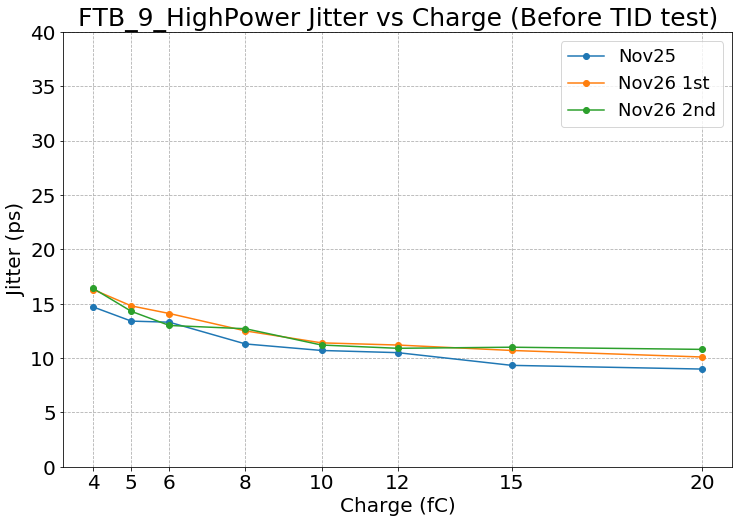

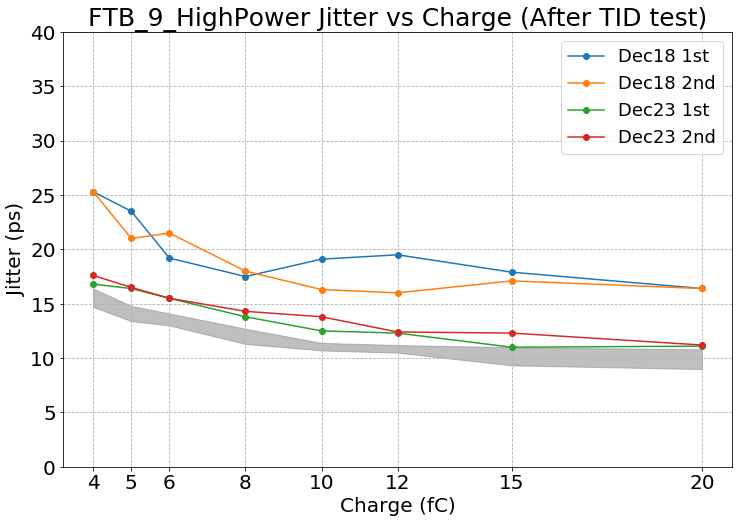

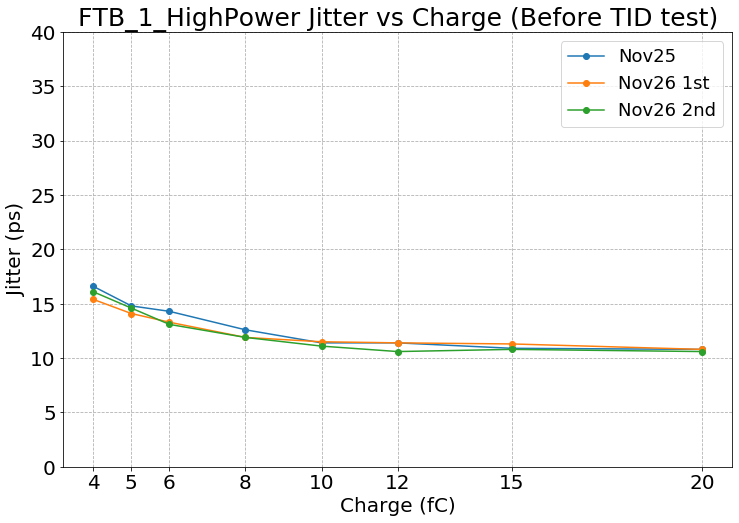

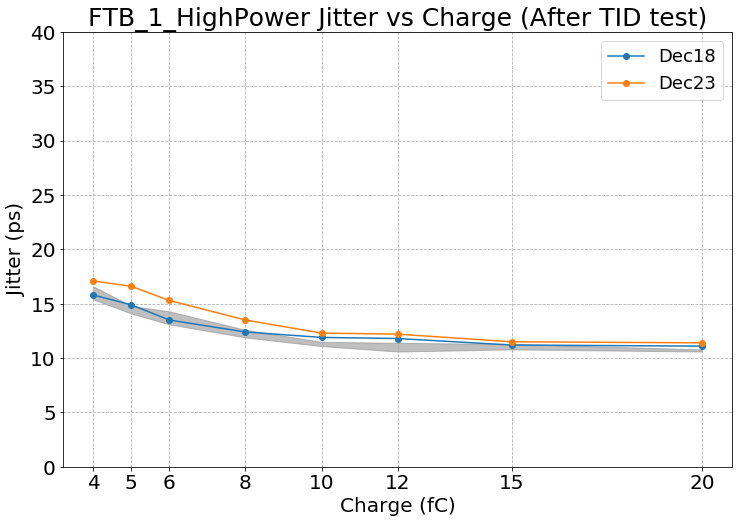

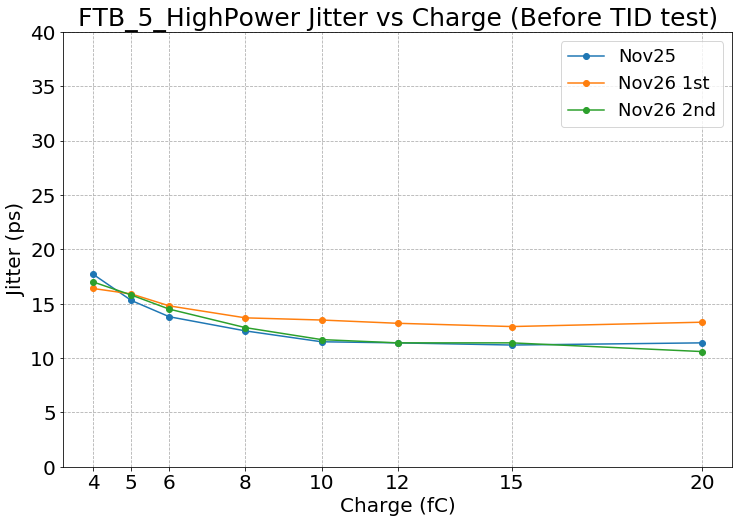

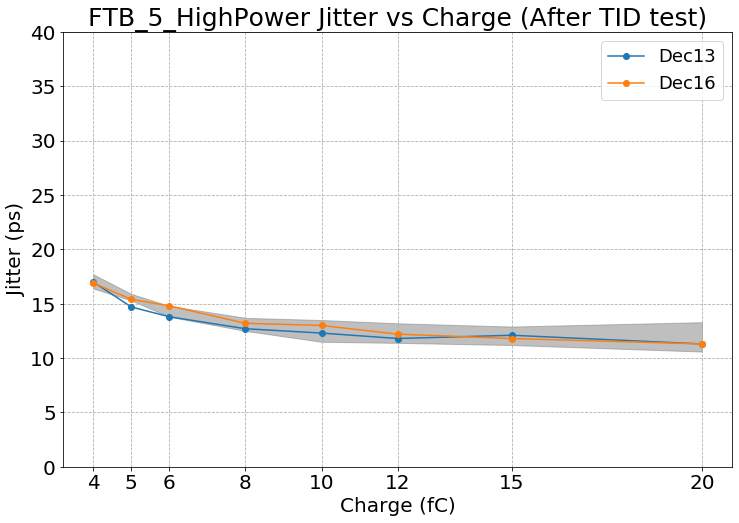

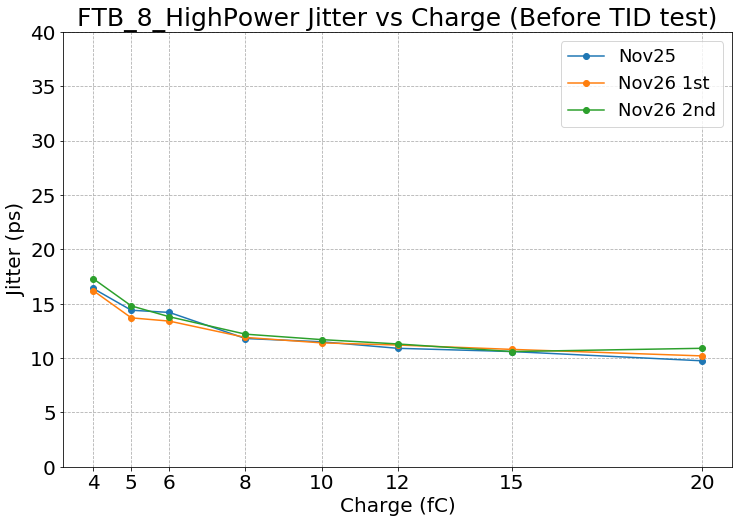

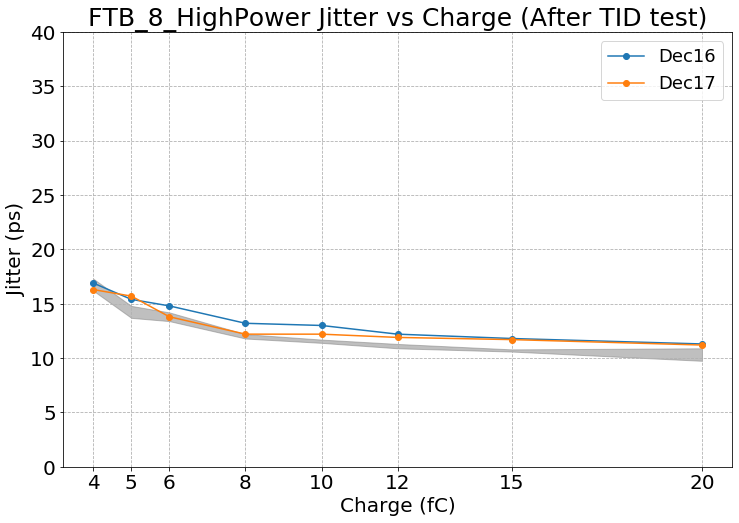

In [3]:
#FTB 9
modes = "HighPower"
y9jitterHigh0 = {"Nov25":[14.7,13.4,13.3,11.3,10.7,10.5,9.33,8.99],
          "Nov26 1st":[16.3,14.8,14.1,12.5,11.4,11.2,10.7,10.1],
          "Nov26 2nd":[16.4,14.3,13,12.7,11.2,10.9,11,10.8]}
y9jitterHigh1 = {"Dec18 1st":[25.3,23.5,19.2,17.5,19.1,19.5,17.9,16.4],
          "Dec18 2nd":[25.3,21,21.5,18,16.3,16,17.1,16.4],
          "Dec23 1st":[16.8,16.4,15.5,13.8,12.5,12.3,11,11.1],
          "Dec23 2nd":[17.6,16.5,15.5,14.3,13.8,12.4,12.3,11.2]}
board_name = "FTB_9_"+modes
make_jitter_plots(board_name, y9jitterHigh0, y9jitterHigh1)

#FTB 1
y1jitterHigh0 = {"Nov25":[16.6,14.8,14.3,12.6,11.4,11.4,10.9,10.8],
          "Nov26 1st":[15.4,14.1,13.3,11.9,11.5,11.4,11.3,10.8],
          "Nov26 2nd":[16.1,14.6,13.1,11.9,11.1,10.6,10.8,10.6]}
y1jitterHigh1 = {"Dec18":[15.8,14.9,13.5,12.4,11.9,11.8,11.2,11.1],
          "Dec23":[17.1,16.6,15.3,13.5,12.3,12.2,11.5,11.4]}
board_name = "FTB_1_"+modes
make_jitter_plots(board_name, y1jitterHigh0, y1jitterHigh1)

#FTB 5
y5jitterHigh0 = {"Nov25":[17.7,15.3,13.8,12.5,11.5,11.4,11.2,11.4],
          "Nov26 1st":[16.4,15.9,14.8,13.7,13.5,13.2,12.9,13.3],
          "Nov26 2nd":[17,15.8,14.5,12.8,11.7,11.4,11.4,10.6]}
y5jitterHigh1 = {"Dec13":[17,14.7,13.8,12.7,12.3,11.8,12.1,11.3],
          "Dec16":[16.9,15.4,14.8,13.2,13,12.2,11.8,11.3]}
board_name = "FTB_5_"+modes
make_jitter_plots(board_name, y5jitterHigh0, y5jitterHigh1)

#FTB 8
y8jitterHigh0 = {"Nov25":[16.4,14.4,14.2,11.8,11.5,10.9,10.6,9.75],
          "Nov26 1st":[16.2,13.7,13.4,11.9,11.4,11.2,10.8,10.2],
          "Nov26 2nd":[17.3,14.8,13.8,12.2,11.7,11.3,10.6,10.9]}
y8jitterHigh1 = {"Dec16":[16.7,14.9,14.5,13.2,12,2,11.8,11.3,11.4],
          "Dec16":[16.9,15.4,14.8,13.2,13,12.2,11.8,11.3],
          "Dec17":[16.3,15.7,13.8,12.2,12.2,11.9,11.7,11.2]}
board_name = "FTB_8_"+modes
make_jitter_plots(board_name, y8jitterHigh0, y8jitterHigh1)


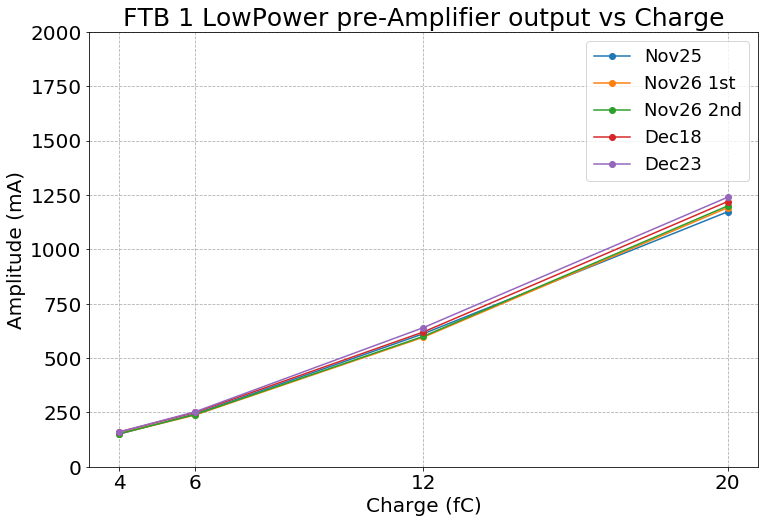

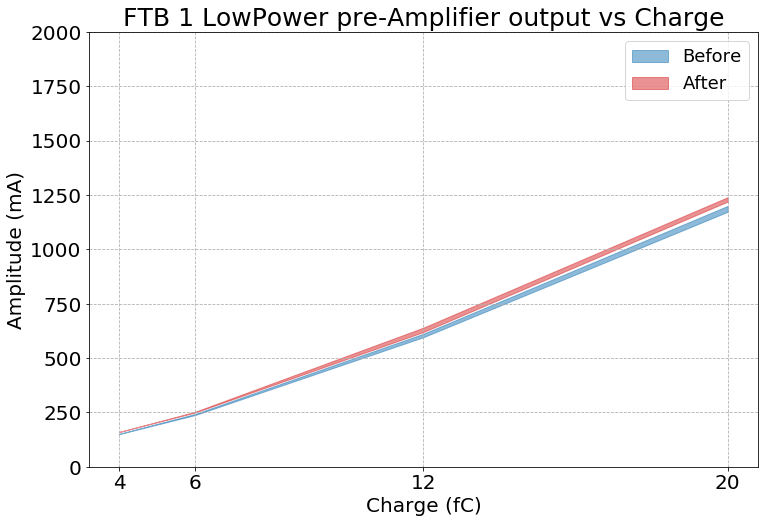

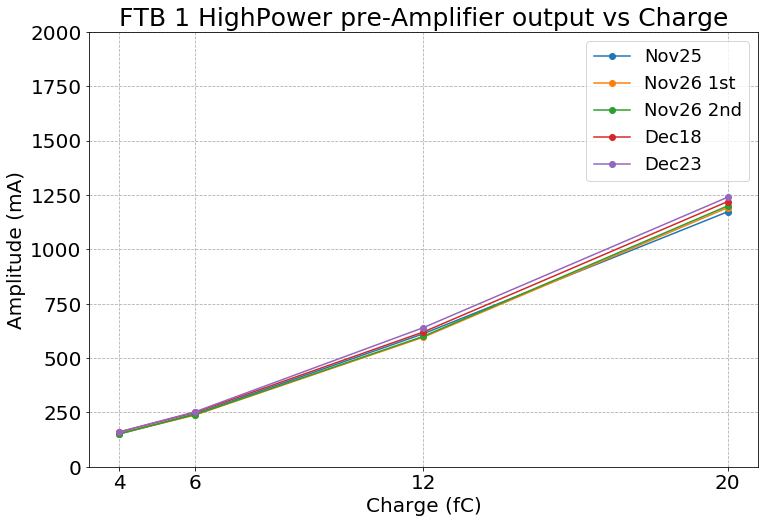

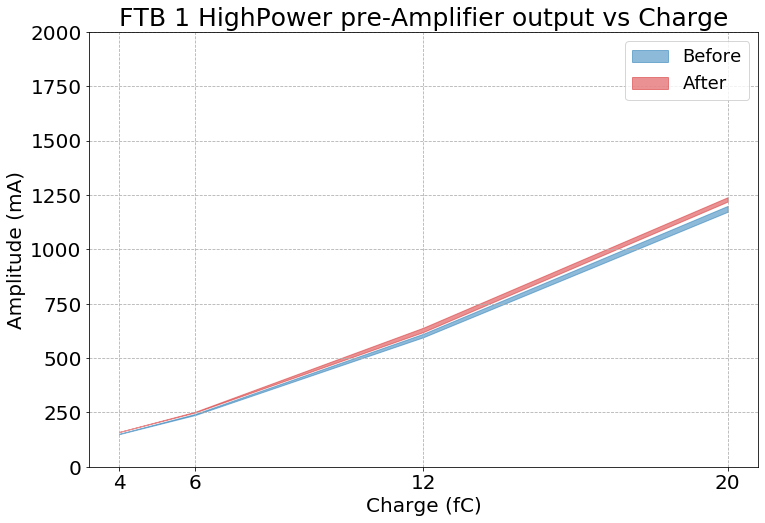

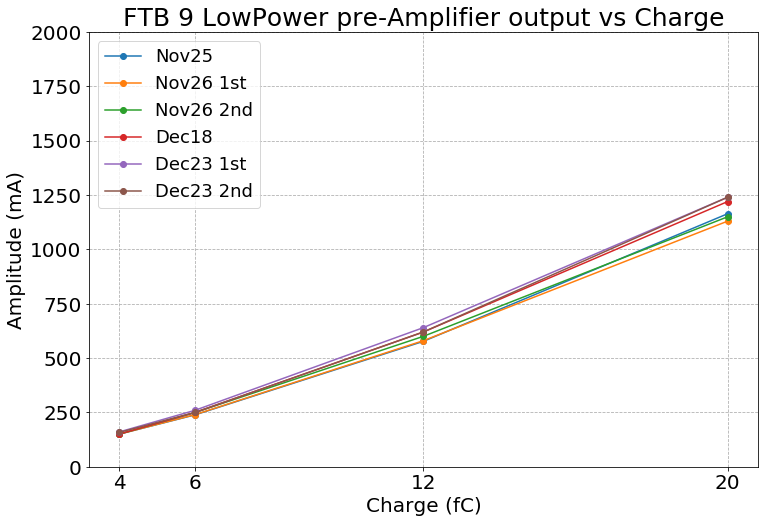

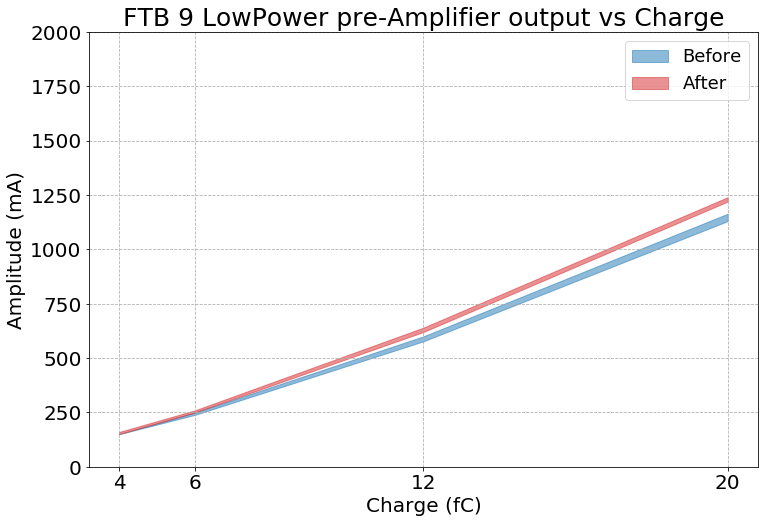

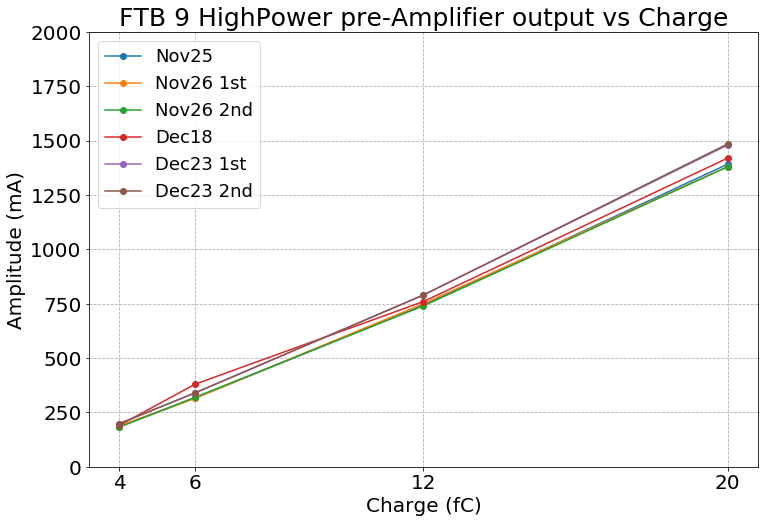

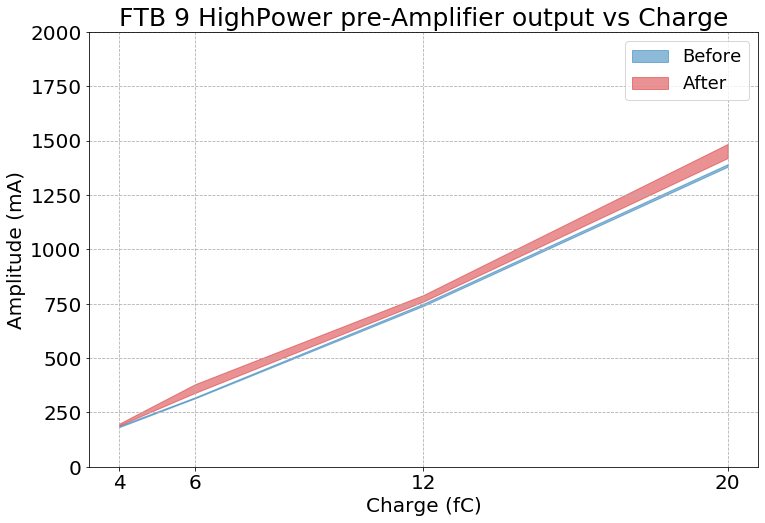

In [4]:
"""
#FTB n =============================================
iboard=n
modes = "LowPower"
yAoutLow0 = {"Nov25":[],
         "Nov26 1st":[],
         "Nov26 2nd":[]}
yAoutLow1 = {"Dec18":[],
         "Dec23":[]}

name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutLow0, yAoutLow1)

modes = "HighPower"
yAoutHigh0 = {"Nov25":[],
         "Nov26 1st":[],
         "Nov26 2nd":[]}
yAoutHigh1 = {"Dec18":[],
         "Dec23":[]}
iboard=1
name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutHigh0, yAoutHigh1)

"""

#FTB 1
modes = "LowPower"
yAoutLow0 = {"Nov25":[150,243,612,1173],
         "Nov26 1st":[152,238,596,1192],
         "Nov26 2nd":[152,240,600,1200]}
yAoutLow1 = {"Dec18":[160,250,620,1220],
         "Dec23":[160,253,640,1240]}
iboard=1
name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutLow0, yAoutLow1)

modes = "HighPower"
yAoutHigh0 = {"Nov25":[150,243,612,1173],
         "Nov26 1st":[152,238,596,1192],
         "Nov26 2nd":[152,240,600,1200]}
yAoutHigh1 = {"Dec18":[160,250,620,1220],
         "Dec23":[160,253,640,1240]}
iboard=1
name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutHigh0, yAoutHigh1)

#FTB 9 =============================================
iboard=9
modes = "LowPower"
yAoutLow0 = {"Nov25":[150,239,577,1164],
         "Nov26 1st":[150,240,580,1130],
         "Nov26 2nd":[150,250,600,1150]}
yAoutLow1 = {"Dec18":[150,250,620,1220],
         "Dec23 1st":[160,260,640,1240],
         "Dec23 2nd":[158,250,620,1240]}

name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutLow0, yAoutLow1)

modes = "HighPower"
yAoutHigh0 = {"Nov25":[184,316,743,1392],
         "Nov26 1st":[188,315,750,1380],
         "Nov26 2nd":[182,320,740,1380]}
yAoutHigh1 = {"Dec18":[190,380,760,1420],
         "Dec23 1st":[198,340,790,1480],
         "Dec23 2nd":[198,340,790,1485]}
name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutHigh0, yAoutHigh1)




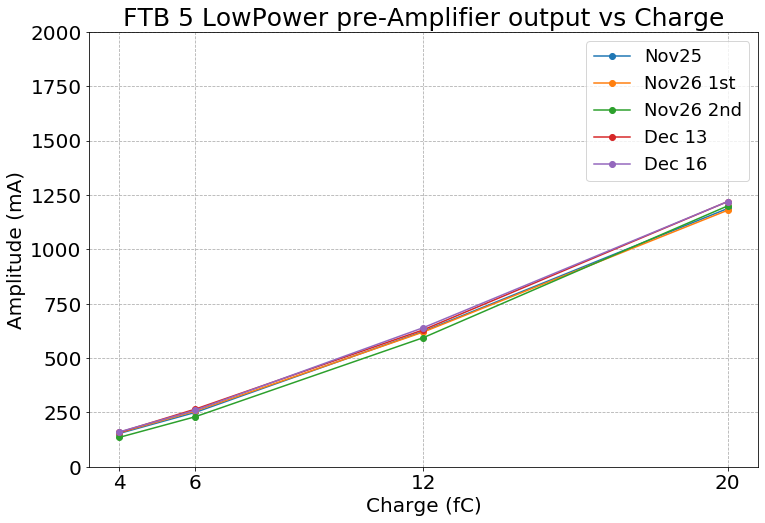

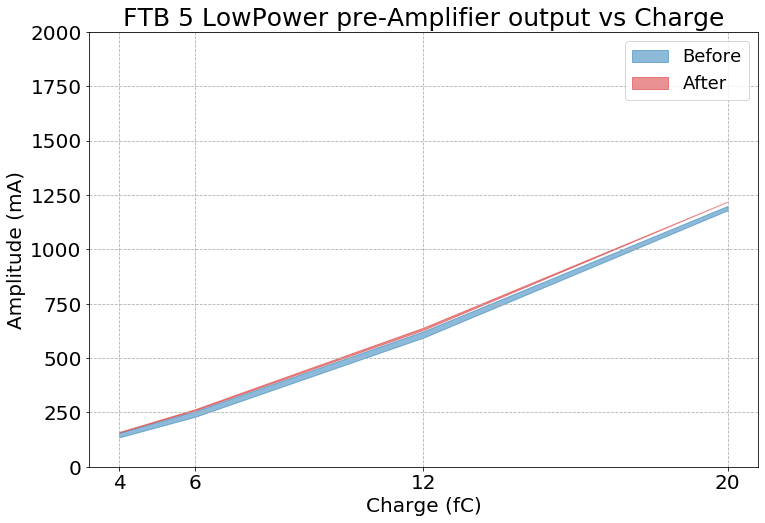

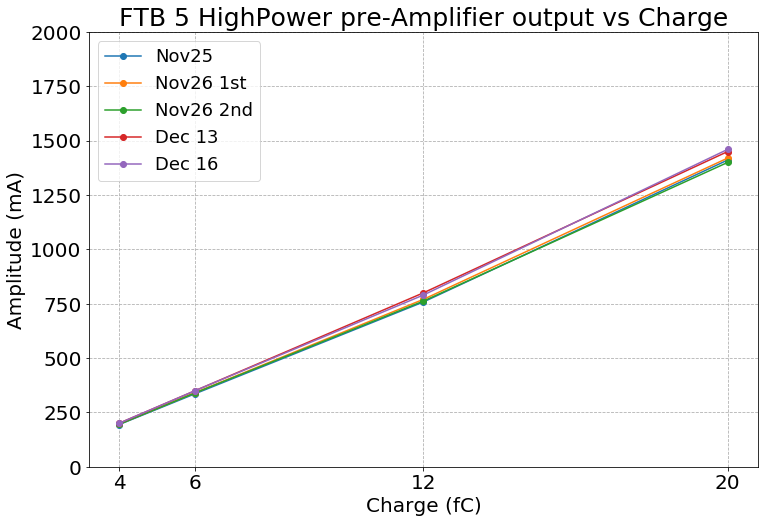

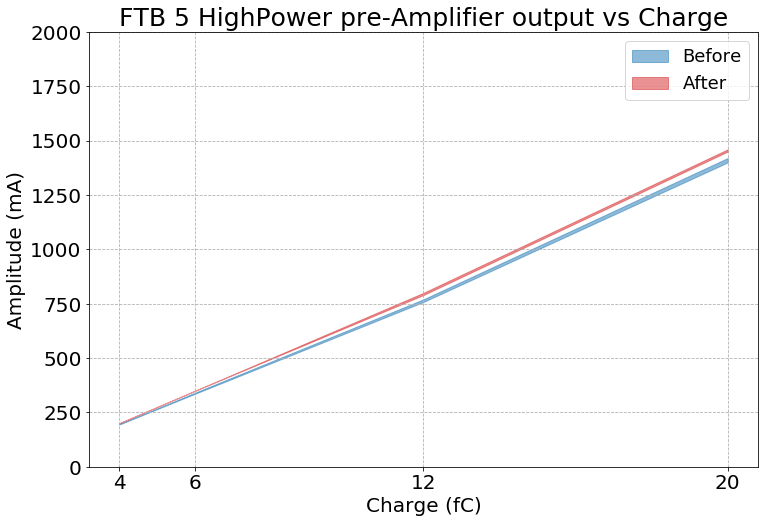

In [5]:
#FTB 5 =============================================
iboard=5
modes = "LowPower"
yAoutLow0 = {"Nov25":[153,250,623,1188],
         "Nov26 1st":[156,256,620,1180],
         "Nov26 2nd":[135,230,594,1200]}
yAoutLow1 = {"Dec 13":[158,265,630,1220],
         "Dec 16":[160,260,640,1220]}

name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutLow0, yAoutLow1)

modes = "HighPower"
yAoutHigh0 = {"Nov25":[194,336,758,1411],
         "Nov26 1st":[196,341,770,1420],
         "Nov26 2nd":[195,340,762,1400]}
yAoutHigh1 = {"Dec 13":[200,350,800,1450],
         "Dec 16":[200,350,790,1460]}
name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutHigh0, yAoutHigh1)

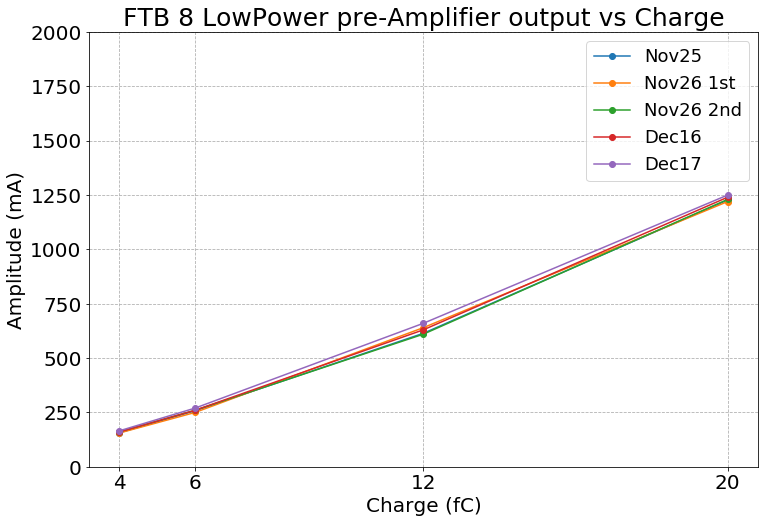

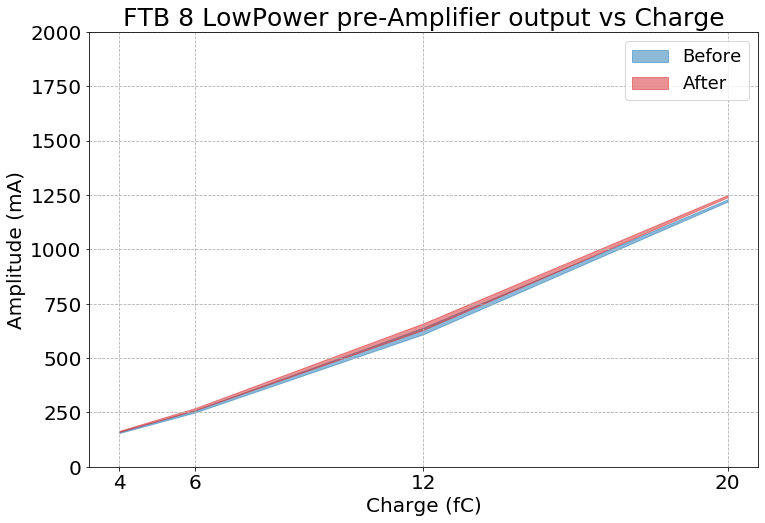

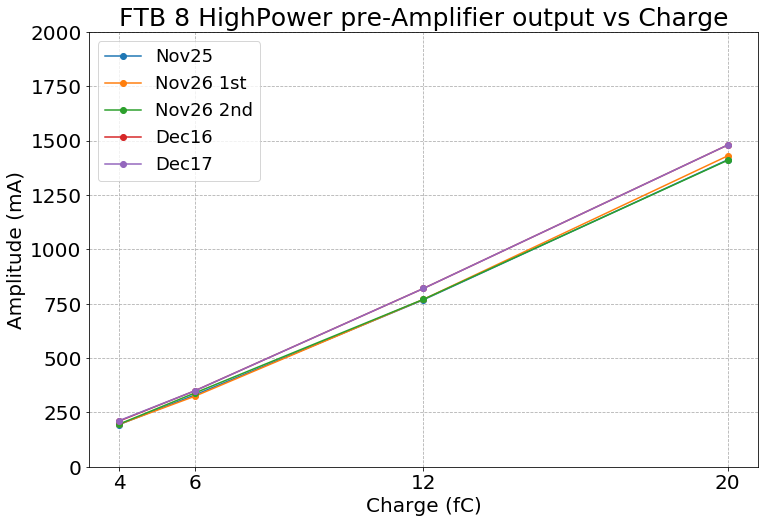

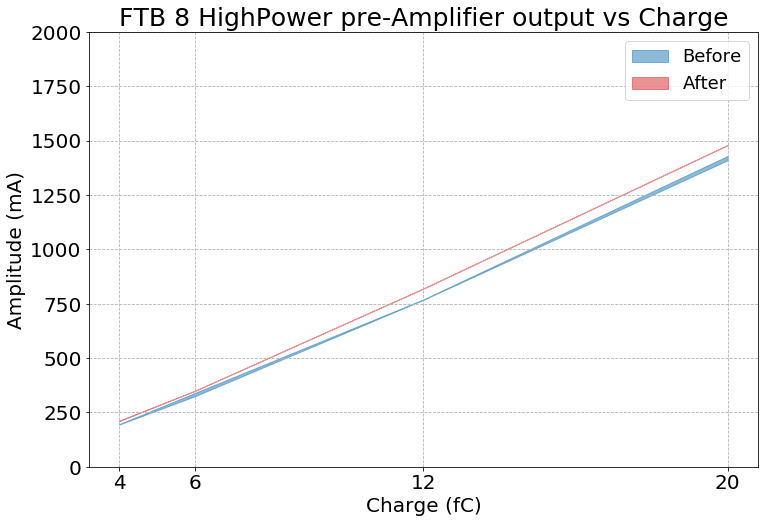

In [6]:
#FTB 8 =============================================
iboard=8
modes = "LowPower"
yAoutLow0 = {"Nov25":[156,258,614,1227],
         "Nov26 1st":[155,250,640,1220],
         "Nov26 2nd":[161,260,610,1230]}
yAoutLow1 = {"Dec16":[160,260,630,1240],
         "Dec17":[165,270,660,1250]}

name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutLow0, yAoutLow1)

modes = "HighPower"
yAoutHigh0 = {"Nov25":[194,331,768,1412],
         "Nov26 1st":[195,325,770,1430],
         "Nov26 2nd":[196,340,770,1410]}
yAoutHigh1 = {"Dec16":[210,350,820,1480],
         "Dec17":[212,350,820,1480]}

name = "Aout_FTB"+str(iboard)+"_"+modes
title = "FTB "+str(iboard)+" "+modes+" pre-Amplifier output vs Charge"

make_Aout_plot(name, title, yAoutHigh0, yAoutHigh1)